In [1]:
from sympy import *
import numpy as np
from scipy.stats import *
from math import tanh, atanh # гиперболический тангенс
import scipy.optimize as opt
import re
from functools import reduce
from scipy.optimize import fsolve

In [2]:
def correct(data):
    mask = re.sub(r'[,]', '.', data).split('; ')
    sample = np.array(list(map(float, mask)))
    return sample

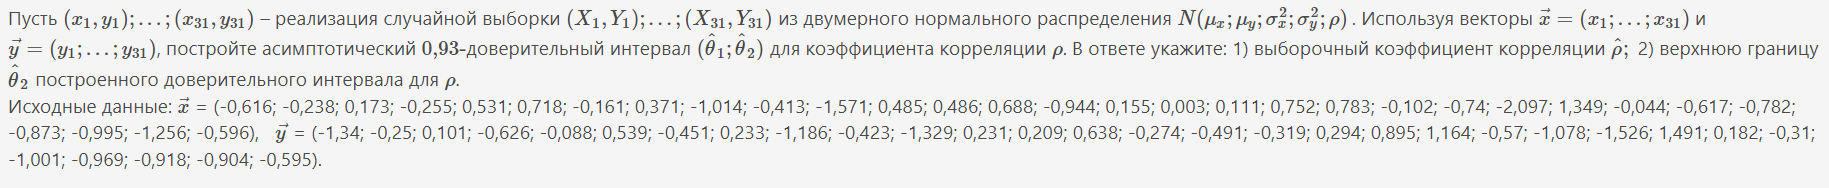

In [3]:
def correlation(xvec, yvec, N, gamma):
    alpha = 1 - gamma
    po = np.corrcoef(xvec, yvec)[1][0]
    teta1 = tanh(0.5*ln((1+po)/(1-po)) - norm.isf(alpha/2)/((N-3)**0.5))
    teta2 = tanh(0.5*ln((1+po)/(1-po)) + norm.isf(alpha/2)/((N-3)**0.5))
    return po, teta2

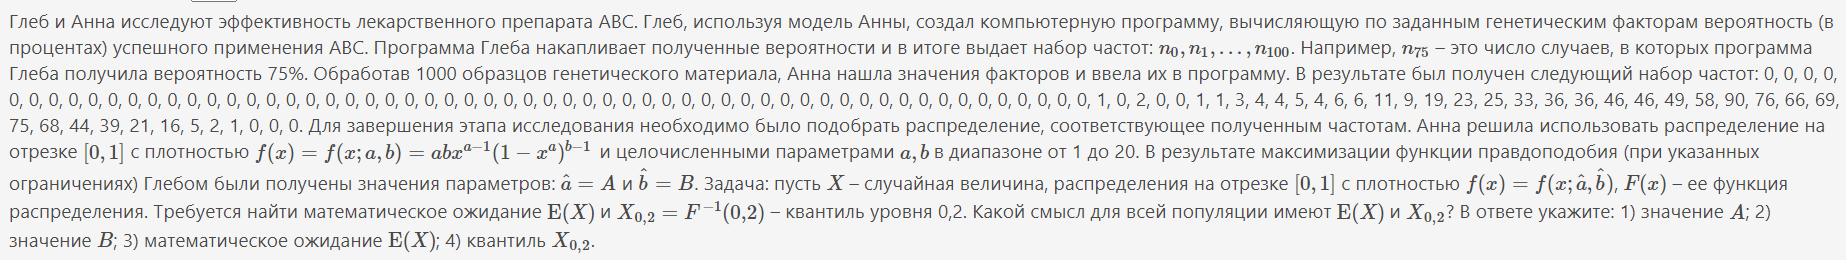

In [3]:
d = dict(zip(range(101), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 3, 5, 5, 3, 6, 3, 5, 8, 7, 6, 4, 7, 17, 15, 15, 13, 13, 12, 21, 24, 17, 26, 21, 27, 34, 29, 19, 22, 22, 22, 16, 13, 9, 11, 5, 2, 3, 0, 0, 0, 0, 0]))
lst = []
for k, v in d.items():
    lst.append([k/100] * v)
    sample = np.array(reduce(lambda x, y: x + y, lst))

In [4]:
N = len(sample)
a, b = 1, 1
mx = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
for a in range(1, 21):
    for b in range(1, 21):
        logL = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
        if mx < logL:
            mx = logL
            ah = a
            bh = b
ah, bh

(11, 7)

In [10]:
def func(n):
    d = dict(zip(range(101), n))
    lst = []
    for k, v in d.items():
        lst.append([k/100] * v)
        sample = np.array(reduce(lambda x, y: x + y, lst))
        
    N = len(sample)
    a, b = 1, 1
    mx = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
    for a in range(1, 21):
        for b in range(1, 21):
            logL = N*np.log(a*b) + (a-1)*np.sum(np.log(sample)) + (b-1)*np.sum(np.log(1-np.power(sample, a)))
            if mx < logL:
                mx = logL
                ah = a
                bh = b
    
    x = Symbol('x')
    f = ah*bh*x**(ah - 1)*(1 - x**ah)**(bh - 1)
    EX = integrate(f*x, (x, 0, 1))
    
    return f'A: {ah}, B: {bh}, EX:  {round(EX, 6)}'

In [11]:
n = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 3, 4, 4, 5, 4, 6, 6, 11, 9, 19, 23, 25, 33, 36, 36, 46, 46, 49, 58, 90, 76, 66, 69, 75, 68, 44, 39, 21, 16, 5, 2, 1, 0, 0, 0]
func(n)

'A: 17, B: 10, EX:  0.843927'

In [14]:
ah = 17
bh = 10
x = Symbol('x')
f = ah*bh*x**(ah - 1)*(1 - x**ah)**(bh - 1) # НЕ ЗАБУДЬ МИНУС -0.2
print(integrate(f, x))


-x**170 + 10*x**153 - 45*x**136 + 120*x**119 - 210*x**102 + 252*x**85 - 210*x**68 + 120*x**51 - 45*x**34 + 10*x**17


In [90]:
def Func(x):
    return -x**170 + 10*x**153 - 45*x**136 + 120*x**119 - 210*x**102 + 252*x**85 - 210*x**68 + 120*x**51 - 45*x**34 + 10*x**17 - 0.2

In [91]:
fsolve(Func, [0.8])

array([0.79904898])

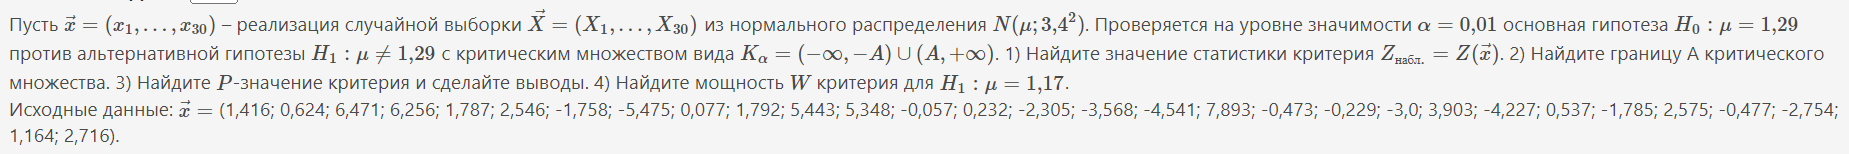

In [8]:
def Z_test_one_sample(data, alpha, sigma, mu0):
    mn = np.mean(data) # выборочное среднее
    Z_st = (mn - mu0)/sigma*len(data)**0.5
    cvalue = norm.isf(alpha/2) # |Z_st| > Z_alpha/2 - промежуток (-oo,-cvalue)U(cvalue, +oo)
    pvalue = 2*(1 - norm.cdf(abs(Z_st))) # pv = 0.5 - Ф0 = 0.5 - (cdf(x) - 0.5) = 1 - cdf(x)
    return f'Z-статистика: {Z_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

In [9]:
def betta(data, alpha, sigma, mu0, mu1):
    n = len(data)
    betta = norm.cdf(norm.isf(alpha/2) - n**.5*(mu1 - mu0)/sigma) - 0.5 + \
    norm.cdf(norm.isf(alpha/2) + n**.5*(mu1 - mu0)/sigma) - 0.5
    W = 1 - betta
    return betta, W

In [10]:
data = np.array([1.416, 0.624, 6.471, 6.256, 1.787, 2.546, -1.758, -5.475, 0.077, 1.792, 5.443, 5.348, -0.057, 0.232, -2.305, -3.568, -4.541, 7.893, -0.473, -0.229, -3.0, 3.903, -4.227, 0.537, -1.785, 2.575, -0.477, -2.754, 1.164, 2.716])
Z_test_one_sample(data, 0.01, 3.4, 1.29)

'Z-статистика: -0.9971235461091598, Крит.об: 2.575829303548901, pvalue: 0.31870454518680225'

In [11]:
betta(data, 0.01, 3.4, 1.29, 1.17)

(0.9885923982328757, 0.011407601767124298)

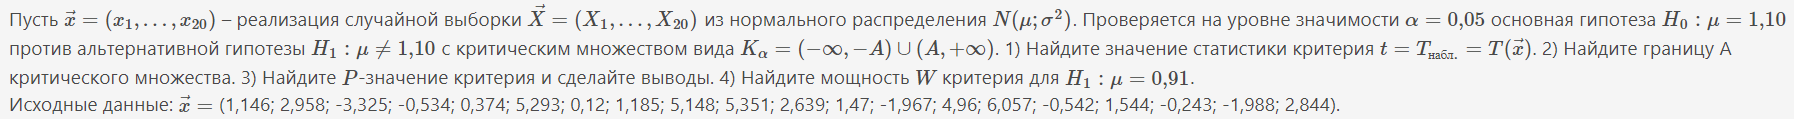

In [12]:
def T_test_one_sample(data, alpha, mu0):
    S = np.var(data, ddof=True)
    mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    T_st = n**.5*(mn - mu0)/S**.5
    cvalue = T.isf(alpha/2)
    pvalue = 2*(1 - T.cdf(abs(T_st)))
    return f'T-статистика: {T_st}, Крит.об: {cvalue}, pvalue: {pvalue}'

In [13]:
def betta_nct(data, alpha, mu0, mu1):
    S = np.var(data, ddof=True)
    #mn = np.mean(data)
    n = len(data)
    T = t(n-1)
    delta = n**.5*(mu1 - mu0)/S**.5
    G = nct(n-1, delta)
    betta =  G.cdf(T.isf(alpha/2)) - G.cdf(-T.isf(alpha/2))
    W = 1 - betta
    return f'МОЩНОСТЬ КРИТЕРИЯ: {W}'

In [14]:
data1 = correct('1,146; 2,958; -3,325; -0,534; 0,374; 5,293; 0,12; 1,185; 5,148; 5,351; 2,639; 1,47; -1,967; 4,96; 6,057; -0,542; 1,544; -0,243; -1,988; 2,844')

In [15]:
T_test_one_sample(data1, 0.05, 1.10)

'T-статистика: 0.8568245565494966, Крит.об: 2.0930240544082634, pvalue: 0.40221988280644494'

In [16]:
betta_nct(data1, 0.05, 1.10, 0.91)

'МОЩНОСТЬ КРИТЕРИЯ: 0.06002869580265269'

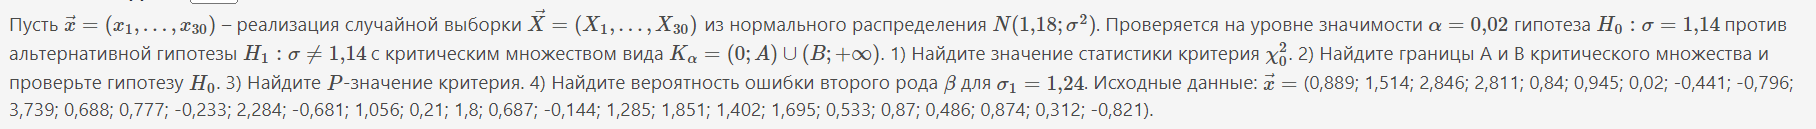

In [96]:
def chi_test_one_sample(data,alpha, mu, sgm0, sgm1):
    n = len(data)
    S = 1/n*sum((data[i] - mu)**2 for i in range(n))
    chi_st = n*S/sgm0**2
    chi = chi2(n)
    A = chi.isf(1-alpha/2)
    B = chi.isf(alpha/2)
    
    p1 = chi.cdf(chi_st)
    p2 = chi.sf(chi_st)
    pvalue = 2*min(p1, p2)
    
    betta = chi.cdf(sgm0**2/sgm1**2*chi.isf(alpha/2)) - chi.cdf(sgm0**2/sgm1**2*chi.isf(1 - alpha/2))
    return f'статистика: {chi_st}, А: {A}, В: {B}, pvalue: {pvalue}, БЕТТА: {betta}'

In [43]:
data = correct('0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821')

In [44]:
chi_test_one_sample(data, 0.02 , 1.18, 1.14, 1.24)

(28.679699907663903,
 14.953456528455447,
 50.892181311517085,
 0.931069638279689,
 0.9392983267568004)

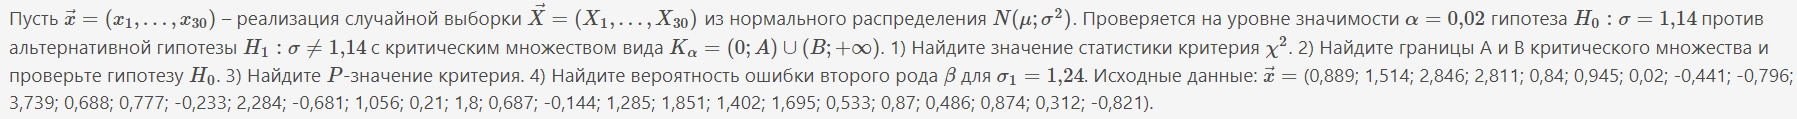

In [103]:
def chi_test_one_sample_unknown_mean(data,alpha, sgm0, sgm1):
    n = len(data)
    mu = data.mean()
    S = 1/(n-1)*sum((data[i] - mu)**2 for i in range(n))
    chi_st = (n-1)*S/sgm0**2
    chi = chi2(n-1)
    A = chi.isf(1-alpha/2)
    B = chi.isf(alpha/2)
    
    p1 = chi.cdf(chi_st)
    p2 = chi.sf(chi_st)
    pvalue = 2*min(p1, p2)
    
    betta = chi.cdf(sgm0**2/sgm1**2*chi.isf(alpha/2)) - chi.cdf(sgm0**2/sgm1**2*chi.isf(1 - alpha/2))
    return f'статистика: {chi_st}, А: {A}, В: {B}, pvalue: {pvalue}, BETTA: {betta}'

In [104]:
data = correct('0,262; 0,906; 1,571; 2,083; 2,775; 2,065; -0,56; 2,194; 3,887; 2,323; -0,022; 1,895; 1,382; 2,039; 1,417; 0,73; 1,583; 1,136; 0,698; 0,957; 0,662; 1,139; 0,944; 2,028; 1,457; 0,926; 1,237; 1,311; -0,112; 1,065; 1,265; -0,121; 0,17; 1,908; 1,751; 0,878; 2,055; 1,568; 1,117; 0,774')

In [106]:
chi_test_one_sample_unknown_mean(data , 0.05, 1.12, 1.22)

'статистика: 22.764016083386476, А: 23.654324557593025, В: 58.120059734686336, pvalue: 0.03543560460483932, BETTA: 0.8638427547546337'

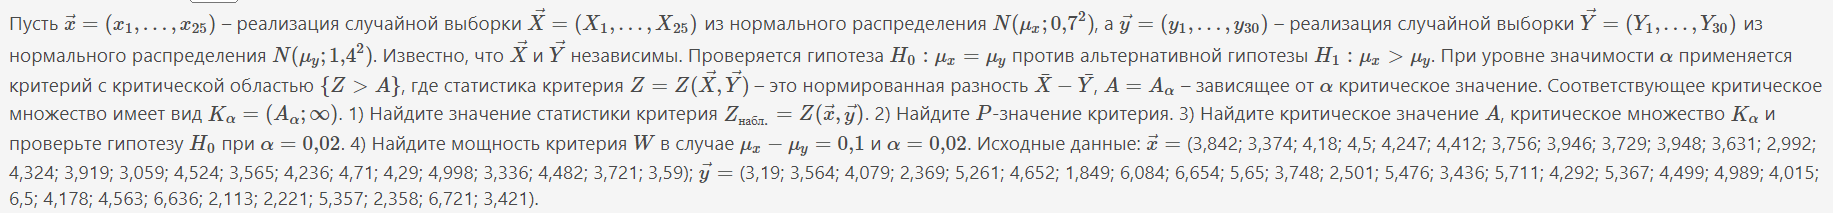

In [25]:
def Z_test_two_sample(xvec, yvec,alpha, sgmx, sgmy, delta):
    '''ПРОВЕРЬ КРИТ ОБЛАСТЬ'''
    n = len(xvec)
    m = len(yvec)
    Z_st = (np.mean(xvec) - np.mean(yvec))/(sgmx**2/n + sgmy**2/m)**0.5
    
    cvalue = norm.isf(alpha)
    
    pvalue = norm.sf(Z_st)
    
    betta =  norm.cdf(norm.isf(alpha) - (n*m)**.5/(m*sgmx**2+n*sgmy**2)**.5 * delta)
    W = 1 - betta
    
    print(f'Статистика Z: {Z_st}\n P-value: {pvalue}\n c-value: {cvalue}\n W!!!: {W}')

In [26]:
xvec = correct('3,678; 5,51; 4,325; 3,44; 2,31; 4,599; 4,626; 3,856; 4,829; 4,744; 4,979; 4,45; 4,555; 3,471; 4,816; 4,896; 4,949; 2,365; 6,089; 4,712; 4,037; 6,414; 4,1; 5,978; 3,6')
yvec = correct('4,408; 2,622; 3,441; 2,766; 4,557; 4,838; 5,857; 6,748; 5,228; 7,27; 6,333; 5,094; 3,159; 2,193; 3,544; 3,601; 2,277; 4,229; 1,945; 3,479; 3,093; 6,238; 4,554; 3,687; 6,656; 1,318; 5,147; 2,83; 3,289; 5,751; 6,041; 2,002; 4,852; 5,716; 3,801')
Z_test_two_sample(xvec, yvec, 0.03, 1.1, 1.3, 0.7)

Статистика Z: 0.6703289922004981
 P-value: 0.25132404462087976
 c-value: 1.880793608151251
 W: 0.6444655598693261


In [27]:
xvec = correct('3,842; 3,374; 4,18; 4,5; 4,247; 4,412; 3,756; 3,946; 3,729; 3,948; 3,631; 2,992; 4,324; 3,919; 3,059; 4,524; 3,565; 4,236; 4,71; 4,29; 4,998; 3,336; 4,482; 3,721; 3,59')
yvec = correct('3,19; 3,564; 4,079; 2,369; 5,261; 4,652; 1,849; 6,084; 6,654; 5,65; 3,748; 2,501; 5,476; 3,436; 5,711; 4,292; 5,367; 4,499; 4,989; 4,015; 6,5; 4,178; 4,563; 6,636; 2,113; 2,221; 5,357; 2,358; 6,721; 3,421')

Z_test_two_sample(xvec, yvec, 0.02, 0.7, 1.4, 0.1)

Статистика Z: -1.4046441651782242
 P-value: 0.9199364416984964
 c-value: 2.053748910631823
 W: 0.043575905243082746


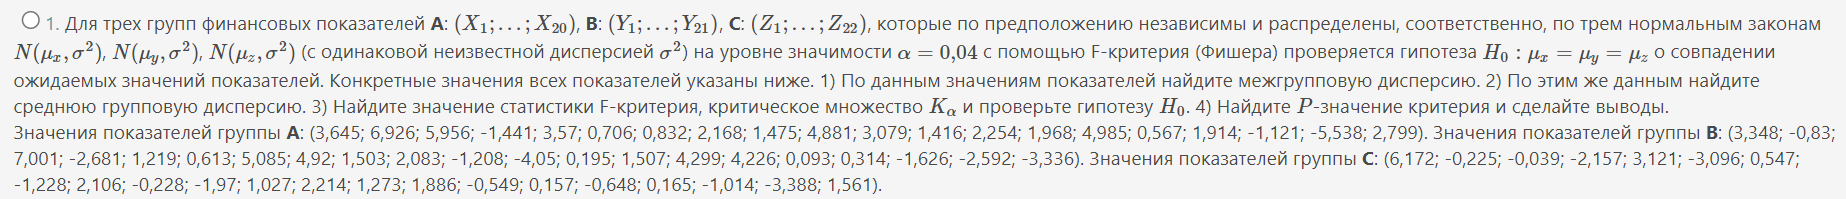

In [12]:
def F_test_three_sample(A, B, C):
    n1 = len(A)
    n2 = len(B)
    n3 = len(C)
    n = n1+n2+n3
    k = 3
    
    amean = A.mean()
    bmean = B.mean()
    cmean = C.mean()

    Sa = np.var(A, ddof=True)
    Sb = np.var(B, ddof=True)
    Sc = np.var(C, ddof=True)

    avar = np.var(A)
    bvar = np.var(B)
    cvar = np.var(C)

    Xm = 1/(n1+n2+n3)*(sum(A)+sum(B)+sum(C))
    Var = 1/(n1+n2+n3)*(sum((A-amean)**2) + sum((B-bmean)**2) + sum((C-cmean)**2)) # средняя выб.дисперсия
    Var2 = 1/n*(avar*n1+bvar*n2+cvar*n3)
    
    SSE = n*Var # внутригрупповая сумма квадратов (=n*(ср.выб.дисп.))
    MSE = SSE/(n-k) # остаточная дисперсия
    delt = 1/n*((amean - Xm)**2*n1 + (bmean - Xm)**2*n2 + (cmean - Xm)**2*n3)
    SSTR = n*delt
    MSTR = SSTR/(k-1)
    
    F_st = MSTR/MSE
    
    F = f(k-1, n-k)
    pvalue = F.sf(F_st)
    
    print(f'Межгрупповая дисперсия: {delt}\n Средняя групповая дисперсия: {Var}\n Статистика F: {F_st}\n p-value: {pvalue}, {Var2}')

In [13]:
A = correct('-2,809; 2,178; -1,128; 0,511; 4,187; 1,881; 1,423; 4,147; 2,689; 1,483; -0,868; -0,194; 4,103; 2,72; 3,514; -0,668; 0,887; 0,359; 4,373; 3,839; 1,78; 0,972; 1,825; 1,372; 1,326; 3,858; 3,047')

In [14]:
B = correct('-2,71; 2,337; 2,797; 1,018; 0,124; 0,086; -0,567; 2,785; 4,423; 4,386; -1,86; 0,629; 2,885; 6,961; -0,533; 0,331; -0,846; -1,239; 2,798; 1,956; 3,575; -0,751; 2,93; 1,414; 1,197; 1,131; -1,332; -1,915; 3,399')

In [15]:
C = correct('0,704; 0,893; -0,369; 5,368; 3,612; -2,572; -0,635; 5,061; 6,179; 1,68; 0,614; -1,042; 0,874; 2,088; -0,278; -0,29; 3,969; 1,56; -3,489')

In [16]:
F_test_three_sample(A, B, C)

Межгрупповая дисперсия: 0.05723316074957756
 Средняя групповая дисперсия: 4.77859536831709
 Статистика F: 0.43117142762192373
 p-value: 0.6514140649916278, 4.77859536831709


In [117]:
k = 3
n1 = len(A)
n2 = len(B)
n3 = len(C)
n = n1+n2+n3
F = f(k-1, n-k)

In [116]:
from scipy.stats import f